In [1]:
# global imports
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# instantiate pathway variables
projectDir = 'D:\mattp\Documents\School\SeniorYear\DataAnalysis'

dataDir = projectDir + '\WaterStreetPA_WthrMETAR_SNOW-2018.csv'

# read in data
Data = pd.read_csv(dataDir,header=0)

In [3]:
Data.shape
print(Data.columns)
Data['Clds10000'][30000:30050]
Data.datetime.values[1]
#features = pd.concat([dtEmumeratedDf, encodedWindDirDf, Data.temperatureF, Data.dewpointF, Data.humidityPCNT, Data.wind_speedMPH, Data.wind_gustsMPH, Data.pressureIN, Data.precipIN,Data.PM25],axis=1)

Index(['Unnamed: 0', 'datetime', 'created_at', 'PM25', 'Date', 'temp',
       'dewpoint', 'RH', 'windDIR', 'windMPH', 'precip', 'mslp', 'visibility',
       'gust', 'wxcodes', '(top) Snow Depth (in)', '(middle) Snow Depth (in)',
       '(bottom) Snow Depth (in)', '(top) Snow Temp. (deg. F)',
       '(middle) Snow Temp. (deg. F)', '(bottom) Snow Temp. (deg. F)',
       '(top) Snow Density (%)', '(middle) Snow Density (%)',
       '(bottom) Snow Density (%)', 'Date w/o Time', 'Hour',
       'Forecasted from 0 UTC', 'FEW', 'SCT', 'BKN', 'OVC', 'VV', 'Clouds',
       'Clds1000', 'Clds2000', 'Clds3000', 'Clds4000', 'Clds5000', 'Clds6000',
       'Clds7000', 'Clds8000', 'Clds9000', 'Clds10000'],
      dtype='object')


'2018-02-22 17:55:54'

In [4]:
# data preprocessing

# process datetime
import datetime as dt
dtParsed = [0 for i in range(Data.shape[0])]
for i in range(Data.shape[0]):
    dtParsed[i] = dt.datetime.strptime(Data.datetime.values[i], '%Y-%m-%d %H:%M:%S')

# enumerate time of day
dtEnumerated = [0 for i in range(Data.shape[0])]
for i in range(Data.shape[0]):
    dtEnumerated[i] = dtParsed[i].hour*3600 + dtParsed[i].minute*60 + dtParsed[i].second
dtEmumeratedDf = pd.DataFrame(dtEnumerated)

# drop out bad rows
Data.reset_index(drop=True, inplace=True)
    
# combine features and output for scaling
features = pd.concat([dtEmumeratedDf, Data.temp, Data.dewpoint, Data.RH, 
                    Data.windDIR, Data.windMPH, Data.precip, Data.mslp,
                    Data.visibility, Data.gust, Data['(top) Snow Depth (in)'],
                    Data['(middle) Snow Depth (in)'], Data['(bottom) Snow Depth (in)'],
                    Data['(top) Snow Temp. (deg. F)'], Data['(middle) Snow Temp. (deg. F)'],
                    Data['(bottom) Snow Temp. (deg. F)'], Data['(top) Snow Density (%)'],
                    Data['(middle) Snow Density (%)'], Data['(bottom) Snow Density (%)'],
                    Data.FEW, Data.SCT, Data.BKN, Data.OVC, Data.VV, Data.Clouds, 
                    Data.Clds1000, Data.Clds2000, Data.Clds3000, Data.Clds4000, Data.Clds5000,
                    Data.Clds6000, Data.Clds7000, Data.Clds8000, Data.Clds9000, Data.Clds10000],axis=1)

In [5]:
features.fillna(0, inplace = True)
(Data.PM25).fillna(0, inplace = True)

# scale features to adjust for BAM benchmarks
coefficients = [1, 0.136378, 1, 1, 1, 1, -0.041879, 1, -0.495839]
'''for i in range(0,len(coefficients)-1):
     features.iloc[:][i] = (features.iloc[:][i]).multiply(coefficients[i], fill_value=0)'''
#features.loc[:][1] = (features.iloc[:][1]).multiply(coefficients[1], fill_value=0)

# scaling for normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = sc.fit_transform(features)

# seperate scaled data(X) and output(y)
X = features
y = (Data.PM25).multiply(0.401344, fill_value=0)

(features.temp).fillna(0, inplace = True)

In [6]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# instantiate regressor model
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(100, input_dim=35, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(100, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(75, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(50, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(1, kernel_initializer='normal'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

# select batch size, epochs, validation set size
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=64,epochs=50,validation_split=0.2)

Using TensorFlow backend.


In [8]:
# train model
log = regressor.fit(X_train,y_train)







Train on 211849 samples, validate on 52963 samples
Epoch 1/50
211849/211849 [==============================] - 14s 66us/step - loss: 14.9553 - mean_absolute_error: 2.6558 - acc: 9.4407e-06 - val_loss: 18.9302 - val_mean_absolute_error: 2.5437 - val_acc: 0.0000e+00
Epoch 2/50
211849/211849 [==============================] - 13s 60us/step - loss: 13.2113 - mean_absolute_error: 2.5198 - acc: 4.7203e-06 - val_loss: 19.4639 - val_mean_absolute_error: 2.3586 - val_acc: 0.0000e+00
Epoch 3/50
211849/211849 [==============================] - 14s 65us/step - loss: 12.0402 - mean_absolute_error: 2.3575 - acc: 1.8881e-05 - val_loss: 16.1885 - val_mean_absolute_error: 2.1954 - val_acc: 0.0000e+00
Epoch 4/50
211849/211849 [==============================] - 14s 64us/step - loss: 10.9696 - mean_absolute_error: 2.2028 - acc: 1.8881e-05 - val_loss: 15.3064 - val_mean_absolute_error: 2.0768 - val_acc: 1.8881e-05
Epoch 5/50
211849/211849 [==============================] - 12s 58us/step - loss: 11.10

Epoch 34/50
211849/211849 [==============================] - 9s 40us/step - loss: 7.9031 - mean_absolute_error: 1.7762 - acc: 1.4161e-05 - val_loss: 13.1770 - val_mean_absolute_error: 1.7324 - val_acc: 3.7762e-05
Epoch 35/50
211849/211849 [==============================] - 10s 45us/step - loss: 7.7925 - mean_absolute_error: 1.7614 - acc: 5.6644e-05 - val_loss: 13.2356 - val_mean_absolute_error: 1.7701 - val_acc: 5.6643e-05
Epoch 36/50
211849/211849 [==============================] - 9s 45us/step - loss: 7.8548 - mean_absolute_error: 1.7708 - acc: 4.2483e-05 - val_loss: 13.2682 - val_mean_absolute_error: 1.7312 - val_acc: 9.4406e-05
Epoch 37/50
211849/211849 [==============================] - 10s 46us/step - loss: 7.9304 - mean_absolute_error: 1.7801 - acc: 3.3042e-05 - val_loss: 13.5485 - val_mean_absolute_error: 1.7910 - val_acc: 3.7762e-05
Epoch 38/50
211849/211849 [==============================] - 9s 41us/step - loss: 7.6876 - mean_absolute_error: 1.7473 - acc: 1.8881e-05 - val_los

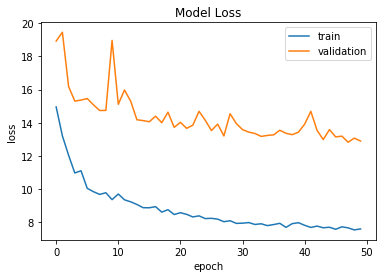

In [12]:
import matplotlib.pyplot as plt

# loss plot
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [13]:
# make predictions
y_pred = regressor.predict(X_test)

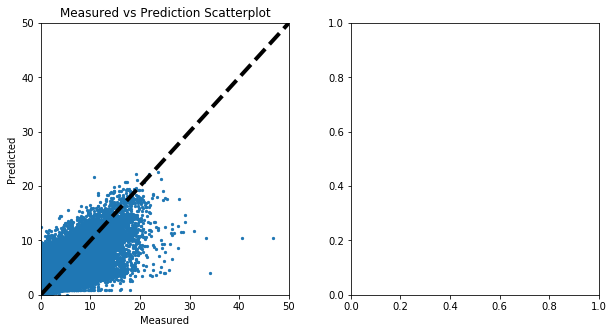

In [18]:
# plot predicitons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
# configure scatterplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(wspace=0.25)
ax1.scatter(y_test, y_pred,5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax1.set_xlabel('Measured')
ax1.set_ylabel('Predicted')
ax1.set_ylim([0,50])
ax1.set_xlim([0,50])
ax1.set_title('Measured vs Prediction Scatterplot')

# configure 2d histogram
# cmap initialization
#heatMap = cm.get_cmap('hot_r',9500)
#newColors = heatMap(np.linspace(0, 1,9500))
#grey = np.array([0.941, 0.941, 0.941,1])
#newColors[1:19,:] = grey
#newHeatMap = ListedColormap(newColors)
# histogram initialization
'''hist = ax2.hist2d(y_test,y_pred,bins=[10,10],cmap='hot_r')
ax2.set_ylim([0,0.3])
ax2.set_xlim([0,0.27])
fig.colorbar(hist[3], ax = ax2)
ax2.set_xlabel('Measured')
ax2.set_ylabel('Predicted')
ax2.set_title('Measured vs Prediction Histogram')'''

plt.show()